In [19]:
# mounting the drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 3  # Change this value as needed

In [21]:
cal = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/without scintillator.txt'

df_cal = pd.read_table(cal, decimal=',')

df_cal.columns = ['Threshold - No Scintillator', 'Frequency - No Scintillator', 'Threshold - With Scintillator', 'Frequency - With Scintillator']

# Processing for the radioactive samples

nAm1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 1.txt'
nAm2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 2.txt'
nAm3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Am 3.txt'

nCo1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Co 1.txt'
nCo2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Co 2.txt'
nCo3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Co 3.txt'

nCs1 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 1.txt'
nCs2 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 2.txt'
nCs3 = '/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Raw_Data/cristal sin color (B60)/Cs 3.txt'

df_nAm1 = pd.read_table(nAm1, decimal=',')
df_nAm2 = pd.read_table(nAm2, decimal=',')
df_nAm3 = pd.read_table(nAm3, decimal=',')

df_nCo1 = pd.read_table(nCo1, decimal=',')
df_nCo2 = pd.read_table(nCo2, decimal=',')
df_nCo3 = pd.read_table(nCo3, decimal=',')

df_nCs1 = pd.read_table(nCs1, decimal=',')
df_nCs2 = pd.read_table(nCs2, decimal=',')
df_nCs3 = pd.read_table(nCs3, decimal=',')

df_nAm = [df_nAm1, df_nAm2, df_nAm3]
df_nCo = [df_nCo1, df_nCo2, df_nCo3]
df_nCs = [df_nCs1, df_nCs2, df_nCs3]

for i in df_nAm:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_nCo:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']

for i in df_nCs:
    i.drop(i.columns[[0, 1, 2, 3]], axis=1, inplace=True)
    i.columns = ['Threshold', 'Frequency']


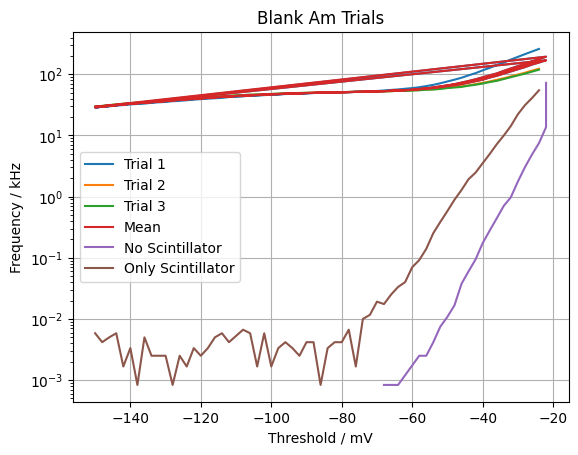

In [22]:
# Checking if all the trials are good and generating the mean result

for i, df in enumerate(df_nAm, start=1):
    plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Blank Am Trials')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

mean_df_nAm = pd.concat(df_nAm).groupby(level=0).mean()

plt.semilogy(mean_df_nAm['Threshold'], mean_df_nAm['Frequency'], label=f'Mean')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - No Scintillator'], df_cal['Frequency - No Scintillator'], label='No Scintillator')
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Data_Processing/Blank Am.png', dpi=300, bbox_inches='tight')

plt.show()


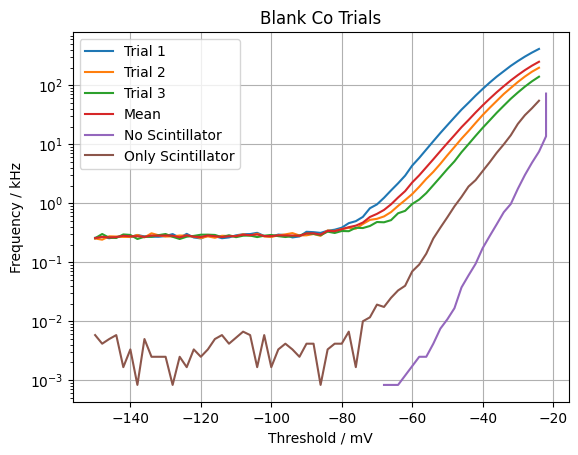

In [23]:
# Checking if all the trials are good and generating the mean result

for i, df in enumerate(df_nCo, start=1):
    plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Blank Co Trials')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

# Getting and scatterting the mean measurements
mean_df_nCo = pd.concat(df_nCo).groupby(level=0).mean()

plt.semilogy(mean_df_nCo['Threshold'], mean_df_nCo['Frequency'], label=f'Mean')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - No Scintillator'], df_cal['Frequency - No Scintillator'], label='No Scintillator')
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Data_Processing/Blank Co.png', dpi=300, bbox_inches='tight')

plt.show()


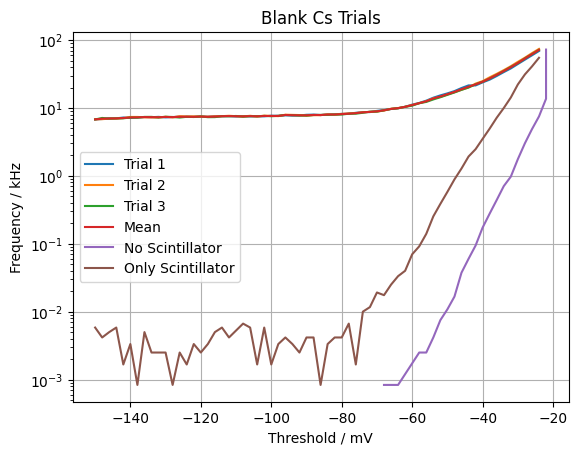

In [24]:
# Checking if all the trials are good and generating the mean result

for i, df in enumerate(df_nCs, start=1):
    plt.semilogy(df['Threshold'], df['Frequency'], label=f'Trial {i}')

plt.title('Blank Cs Trials')
plt.xlabel('Threshold / mV')
plt.ylabel('Frequency / kHz')

# Getting and scatterting the mean measurements
mean_df_nCs = pd.concat(df_nCs).groupby(level=0).mean()

plt.semilogy(mean_df_nCs['Threshold'], mean_df_nCs['Frequency'], label=f'Mean')

# Plotting the calibration measurements
plt.semilogy(df_cal['Threshold - No Scintillator'], df_cal['Frequency - No Scintillator'], label='No Scintillator')
plt.semilogy(df_cal['Threshold - With Scintillator'], df_cal['Frequency - With Scintillator'], label='Only Scintillator')

plt.grid()
plt.legend()

plt.savefig('/content/drive/Shareddrives/Physics Lab 4/Gamma Ray Spectroscopy/Data_Processing/Blank Cs.png', dpi=300, bbox_inches='tight')

plt.show()
